In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [11]:
# data set, set features and target
data=pd.read_csv('Apple_data_3years.csv')

features= data[['Open','High','Low','Volume','SMA_10','EMA_5','MOM_5','ROC_12','ATR_14','MFI_10','OBV_10',"STO_10","STOK","MACD_10_26"]]


target=data['Close'];target=target.astype(float)
target=data['Close']



# rise or drop
data['change'] = data['Close']-data['Open']
data['up']= data['change']
data['up'][data['change']>=0] = 1
data['up'][data['change']<0] = -1
target1 = data['up']


C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_7976\653803080.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['up'][data['change']>=0] = 1
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_7976\653803080.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['up'][data['change']<0] = -1


In [12]:
#数据归一化处理
min_max_scaler = preprocessing.MinMaxScaler()#X_scaled = (X - X_min) / (X_max - X_min)
features = min_max_scaler.fit_transform(features)#两列数据转化
 

In [13]:
#数据集划分
split_num=int(len(features)*0.80)
X_train=features[:split_num]
Y_train=target[:split_num]
X_test=features[split_num:]
Y_test=target[split_num:]

Y_train1=target1[:split_num]
Y_test1=target1[split_num:]

# 2. price prediction

In [14]:
def cross_val(model, X, Y):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

In [15]:
def print_evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('__________________________________')

## 1.logistics

In [16]:
Y_train1[Y_train1==-1]=0
Y_test1[Y_test1==-1]=0

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train1)

test_proba = log_reg.predict_proba(X_test)
train_proba = log_reg.predict_proba(X_train)

test_pred = np.where(test_proba[:, 1] > 0.5, 1, 0)
train_pred = np.where(train_proba[:, 1] > 0.5, 1, 0)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)


Test set evaluation:
_____________________________________
MAE: 0.14227642276422764
MSE: 0.14227642276422764
RMSE: 0.37719547023291206
R2 Square: 0.4184397163120568
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.12857142857142856
MSE: 0.12857142857142856
RMSE: 0.35856858280031806
R2 Square: 0.4829232341166816
__________________________________


In [17]:
np.unique(Y_test1)

array([0., 1.])

In [18]:
np.unique(test_pred)

array([0, 1])

In [19]:
#test_pred = np.where(test_pred == 0, -1, 1)
#cal(Y_test1, test_pred)
print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)
accuracy = accuracy_score(Y_test1, test_pred)
print("Test set Accuracy:", accuracy)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)
accuracy = accuracy_score(Y_train1, train_pred)
print("Train set Accuracy:", accuracy)
 
confusion = confusion_matrix(Y_test1, test_pred)
print("Confusion Matrix:")
print(confusion)

report = classification_report(Y_test1, test_pred)
print("Classification Report:")
print(report)

Test set evaluation:
_____________________________________
MAE: 0.14227642276422764
MSE: 0.14227642276422764
RMSE: 0.37719547023291206
R2 Square: 0.4184397163120568
__________________________________
Test set Accuracy: 0.8577235772357723
Train set evaluation:
_____________________________________
MAE: 0.12857142857142856
MSE: 0.12857142857142856
RMSE: 0.35856858280031806
R2 Square: 0.4829232341166816
__________________________________
Train set Accuracy: 0.8714285714285714
Confusion Matrix:
[[ 89  16]
 [ 19 122]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       105
         1.0       0.88      0.87      0.87       141

    accuracy                           0.86       246
   macro avg       0.85      0.86      0.86       246
weighted avg       0.86      0.86      0.86       246



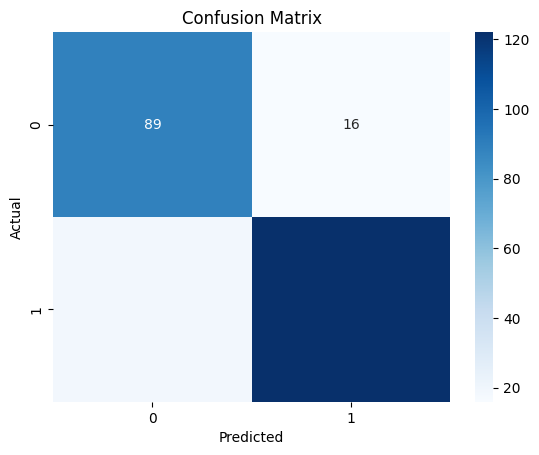

In [20]:
confusion = confusion_matrix(Y_test1, test_pred)

sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

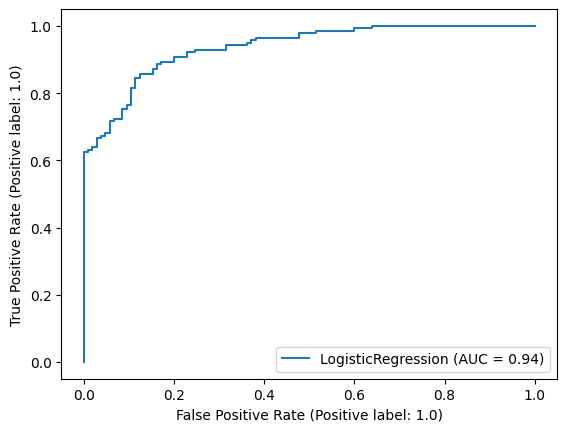

In [21]:
from sklearn.metrics import RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(log_reg, X_test,Y_test1)


###Prediction Error (MAE, MSE, RMSE): The prediction error of the model is relatively small, especially on the training set. This means that the predictions of the model are close to the true values.

R2 Score: The R2 score measures the ability of a model to explain the variability of the target variable, with a range from 0 to 1. The R2 scores of the model on the test set and training set are 0.418 and 0.483, respectively. This means that the model can explain about 42% to 48% of the variability of the target variable.

Accuracy: Accuracy is the proportion of samples that the model predicts correctly out of the total samples. The accuracy of the model on the test set and training set is 85.7% and 87.1%, respectively. This means that the model can correctly predict the majority of the samples.

Confusion Matrix and Classification Report: The precision of the model when predicting "down" (0) is 0.82, the recall is 0.85, and the F1 score is 0.84. When predicting "up" (1), the precision is 0.88, the recall is 0.87, and the F1 score is 0.87. This suggests that the model performs relatively well when predicting both "up" and "down", especially its performance is slightly better when predicting "up".

AUC: The AUC is the area under the ROC curve, a measure of the model's ability to distinguish between positive and negative classes, with a range from 0.5 (random prediction) to 1 (perfect prediction). The AUC of the model is 0.94. This is a very good result, indicating that the model performs excellently in distinguishing between "up" and "down".

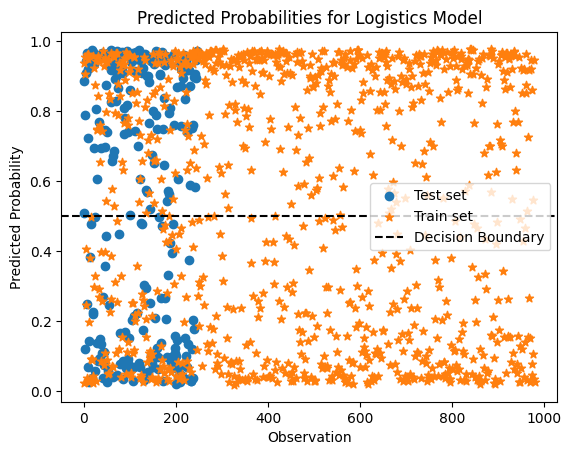

In [24]:
# logistics visual
#sns.set(font_scale=1.2)
#plt.rcParams['font.sans-serif'] = 'SimHei'
#plt.rcParams['axes.unicode_minus'] = False
#plt.rc('font', size=6)
test_index = np.arange(len(test_proba))
train_index = np.arange(len(train_proba))

test_pred_series = pd.Series(test_proba[:, 1], index=test_index)
train_pred_series = pd.Series(train_proba[:, 1], index=train_index)

# Plotting the predicted probabilities
plt.scatter(test_pred_series.index, test_pred_series.values, marker='o', label='Test set')
plt.scatter(train_pred_series.index, train_pred_series.values, marker='*', label='Train set')
plt.axhline(y=0.5, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Observation')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Logistics Model')
plt.legend()
plt.show()

## 2.probit

In [25]:
Y_train1[Y_train1==-1]=0
Y_test1[Y_test1==-1]=0

probit_model = sm.Probit(Y_train1, X_train)
probit_result = probit_model.fit()

test_pred = probit_result.predict(X_test)
train_pred = probit_result.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)

Optimization terminated successfully.
         Current function value: 0.136075
         Iterations 10
Test set evaluation:
_____________________________________
MAE: 0.07448482315544093
MSE: 0.03331801085267533
RMSE: 0.18253221867022634
R2 Square: 0.8638113647578183
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.08334430100362343
MSE: 0.04043983062290839
RMSE: 0.2010965703907165
R2 Square: 0.8373628024227349
__________________________________


In [26]:
threshold = 0.5
binary_pred = np.where(test_pred > threshold, 1, 0)
binary_pred_train= np.where(train_pred > threshold, 1, 0)

In [27]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, binary_pred)
accuracy = accuracy_score(Y_test1, binary_pred)
print("Test set Accuracy:", accuracy)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, binary_pred_train)
accuracy = accuracy_score(Y_train1, binary_pred_train)
print("Train set Accuracy:", accuracy)
 
confusion = confusion_matrix(Y_test1, binary_pred)
print("Confusion Matrix:")
print(confusion)

report = classification_report(Y_test1, binary_pred)
print("Classification Report:")
print(report)

Test set evaluation:
_____________________________________
MAE: 0.036585365853658534
MSE: 0.036585365853658534
RMSE: 0.19127301391900148
R2 Square: 0.8504559270516717
__________________________________
Test set Accuracy: 0.9634146341463414
Train set evaluation:
_____________________________________
MAE: 0.05102040816326531
MSE: 0.05102040816326531
RMSE: 0.22587697572631282
R2 Square: 0.7948108071891593
__________________________________
Train set Accuracy: 0.9489795918367347
Confusion Matrix:
[[102   3]
 [  6 135]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       105
         1.0       0.98      0.96      0.97       141

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



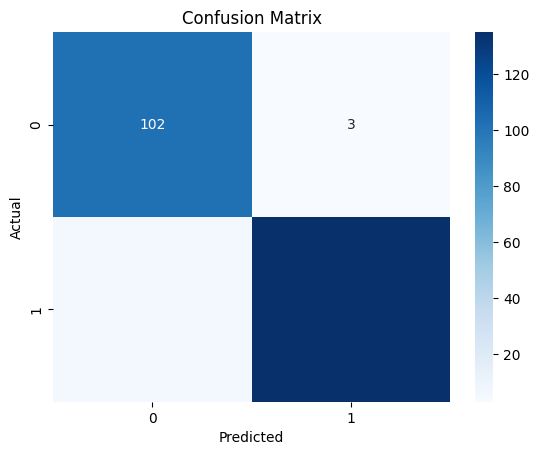

In [28]:
confusion = confusion_matrix(Y_test1, binary_pred)

sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

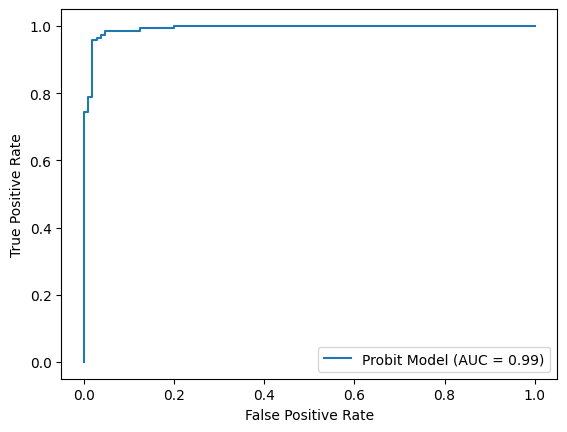

In [29]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, _ = roc_curve(Y_test1, test_pred)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Probit Model')
roc_display.plot()

###Prediction Error (MAE, MSE, RMSE): The prediction error of the Probit model (on both the test set and training set) is very small, implying that the model's predictions are close to the true values.

R2 Score: The R2 score measures the ability of a model to explain the variability of the target variable, with a range from 0 to 1. The model's R2 scores on the test set and training set are 0.864 and 0.837, respectively. This suggests that the model explains about 84% to 86% of the variability of the target variable, which is a very high score.

Accuracy: Accuracy is the proportion of samples that the model predicts correctly out of the total samples. The accuracy of the model on the test set and training set are both very high, reaching 96.3% and 94.9%, respectively. This means that the model can correctly predict most of the samples.

Confusion Matrix and Classification Report: The precision of the model when predicting "down" (0) is 0.94, the recall is 0.97, and the F1 score is 0.96. When predicting "up" (1), the precision is 0.98, the recall is 0.96, and the F1 score is 0.97. This suggests that the model performs very well when predicting both "up" and "down", especially its performance is slightly better when predicting "up".

AUC: The AUC is the area under the ROC curve, a measure of the model's ability to distinguish between positive and negative classes, with a range from 0.5 (random prediction) to 1 (perfect prediction). The AUC of the model is 0.99. This is almost a perfect result, indicating that the model is very strong at distinguishing between "up" and "down".

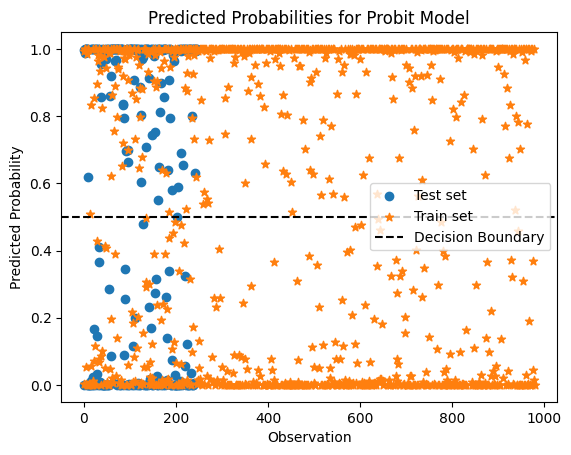

In [30]:
# probit visual
#sns.set(font_scale=1.2)
#plt.rcParams['font.sans-serif'] = 'SimHei'
#plt.rcParams['axes.unicode_minus'] = False
#plt.rc('font', size=6)

# Create index for test_pred and train_pred
test_index = np.arange(len(test_pred))
train_index = np.arange(len(train_pred))

# Convert test_pred and train_pred to pandas Series
test_pred_series = pd.Series(test_pred, index=test_index)
train_pred_series = pd.Series(train_pred, index=train_index)

# Plotting the predicted probabilities
plt.scatter(test_pred_series.index, test_pred_series.values, marker='o', label='Test set')
plt.scatter(train_pred_series.index, train_pred_series.values, marker='*', label='Train set')
plt.axhline(y=0.5, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Observation')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Probit Model')
plt.legend()
plt.show()

###Whether in larger samples or in smaller samples over a period of 3 years, the Probit regression model outperforms the Logistic regression model in predicting stock rises and falls. Here are the main comparisons:

Prediction Error (MAE, MSE, RMSE): In all cases, the prediction error of the Probit model is smaller than that of the Logistic regression model. This means that the predictions of the Probit model are closer to the true values.

R2 Score: In all cases, the R2 score of the Probit model is higher than that of the Logistic regression model. This means that the Probit model performs better in explaining the variability of the target variable.

Accuracy: In all cases, the accuracy of the Probit model is higher than that of the Logistic regression model. This means that the Probit model performs better in terms of the proportion of correctly predicted samples out of the total samples.

Confusion Matrix and Classification Report: In all cases, the precision, recall, and F1 scores of the Probit model when predicting "down" (0) and "up" (1) are higher than those of the Logistic regression model. This means that the Probit model performs better in predicting both "up" and "down".

AUC: In all cases, the AUC score of the Probit model is higher than that of the Logistic regression model, which indicates that the Probit model is stronger in distinguishing between "up" and "down".